In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
buildings = gpd.read_parquet('/data/uscuni-ulce/germany_ages/buildings_age.parquet')
buildings

,geometry,morph,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,index_right,year,id
1154_128880,"POLYGON ((6.73003 49.18855, 6.73011 49.18861, ...",1154_193_0,False,2,4,7,15,22,53,99,150699,1967,DEC_301181813
1154_128806,"POLYGON ((6.73036 49.18881, 6.73047 49.18888, ...",1154_193_0,False,2,4,7,15,22,53,99,256047,1966,DEC_301181835
1154_128833,"POLYGON ((6.7303 49.18911, 6.73033 49.18913, 6...",1154_193_0,False,2,4,7,15,22,53,99,210042,1949,DEC_301181822
1154_128868,"POLYGON ((6.72962 49.1888, 6.72969 49.18885, 6...",1154_193_0,False,2,4,7,15,22,53,99,60597,1971,DEC_301181966
1154_128835,"POLYGON ((6.7294 49.1887, 6.72952 49.18879, 6....",1154_193_0,False,2,4,7,15,22,53,99,73170,1957,DEC_301181934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289_544749,"POLYGON ((13.31611 48.32543, 13.31617 48.32547...",51289_8434_11,False,2,4,7,13,20,47,87,3035810,1958,DE2_DEBY_LOD2_7944607
51289_544745,"POLYGON ((13.31638 48.32562, 13.31648 48.32569...",51289_8434_1,False,2,4,7,15,22,53,97,3007219,1955,DE2_DEBY_LOD2_7944608
51289_545797,"POLYGON ((13.31659 48.32516, 13.31673 48.32521...",51289_8434_11,False,2,4,7,13,20,47,87,1120094,1973,DE2_DEBY_LOD2_7944295
51289_544818,"POLYGON ((13.31627 48.32494, 13.31645 48.325, ...",51289_8434_11,False,2,4,7,13,20,47,87,252234,1972,DE2_DEBY_LOD2_7944296


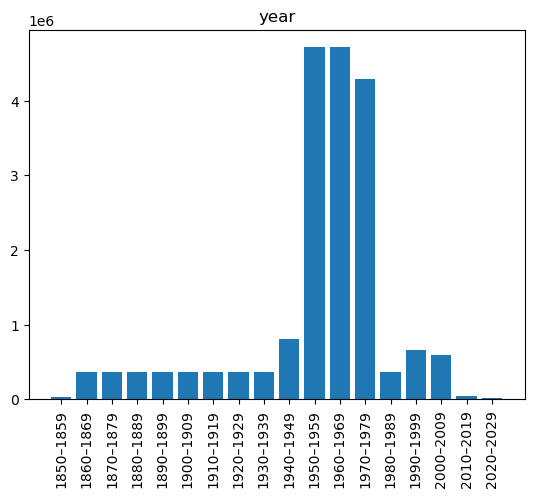

In [7]:
bins = list(range(1850, 2040, 10))
bin_centers = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins)-1)]
bin_labels = [f'{bins[i]}–{bins[i+1]-1}' for i in range(len(bins)-1)]
buildings.hist(column="year",bins=bins, rwidth=0.8)
plt.xticks(bin_centers, bin_labels, rotation=90)
plt.grid(False)

In [19]:
buildings["year_bin"] = pd.cut(buildings["year"], bins=bins, labels=bin_labels, right=True)
buildings

,geometry,morph,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,index_right,year,id,east_west,year_bin
1154_128880,"POLYGON ((6.73003 49.18855, 6.73011 49.18861, ...",1154_193_0,False,2,4,7,15,22,53,99,150699,1967,DEC_301181813,western,1960–1969
1154_128806,"POLYGON ((6.73036 49.18881, 6.73047 49.18888, ...",1154_193_0,False,2,4,7,15,22,53,99,256047,1966,DEC_301181835,western,1960–1969
1154_128833,"POLYGON ((6.7303 49.18911, 6.73033 49.18913, 6...",1154_193_0,False,2,4,7,15,22,53,99,210042,1949,DEC_301181822,western,1940–1949
1154_128868,"POLYGON ((6.72962 49.1888, 6.72969 49.18885, 6...",1154_193_0,False,2,4,7,15,22,53,99,60597,1971,DEC_301181966,western,1970–1979
1154_128835,"POLYGON ((6.7294 49.1887, 6.72952 49.18879, 6....",1154_193_0,False,2,4,7,15,22,53,99,73170,1957,DEC_301181934,western,1950–1959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289_544749,"POLYGON ((13.31611 48.32543, 13.31617 48.32547...",51289_8434_11,False,2,4,7,13,20,47,87,3035810,1958,DE2_DEBY_LOD2_7944607,western,1950–1959
51289_544745,"POLYGON ((13.31638 48.32562, 13.31648 48.32569...",51289_8434_1,False,2,4,7,15,22,53,97,3007219,1955,DE2_DEBY_LOD2_7944608,western,1950–1959
51289_545797,"POLYGON ((13.31659 48.32516, 13.31673 48.32521...",51289_8434_11,False,2,4,7,13,20,47,87,1120094,1973,DE2_DEBY_LOD2_7944295,western,1970–1979
51289_544818,"POLYGON ((13.31627 48.32494, 13.31645 48.325, ...",51289_8434_11,False,2,4,7,13,20,47,87,252234,1972,DE2_DEBY_LOD2_7944296,western,1970–1979


In [21]:
def hist_build_types(lvl):
    grouped = buildings.groupby(["year_bin", f"level_{lvl}_label"]).size().reset_index(name="count")
    pivot_df = grouped.pivot(index="year_bin", columns=f"level_{lvl}_label", values="count").fillna(0)
    pivot_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0)
    pivot_pct.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12,6))

/tmp/ipykernel_41829/2293897228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = buildings.groupby(["year_bin", f"level_{lvl}_label"]).size().reset_index(name="count")


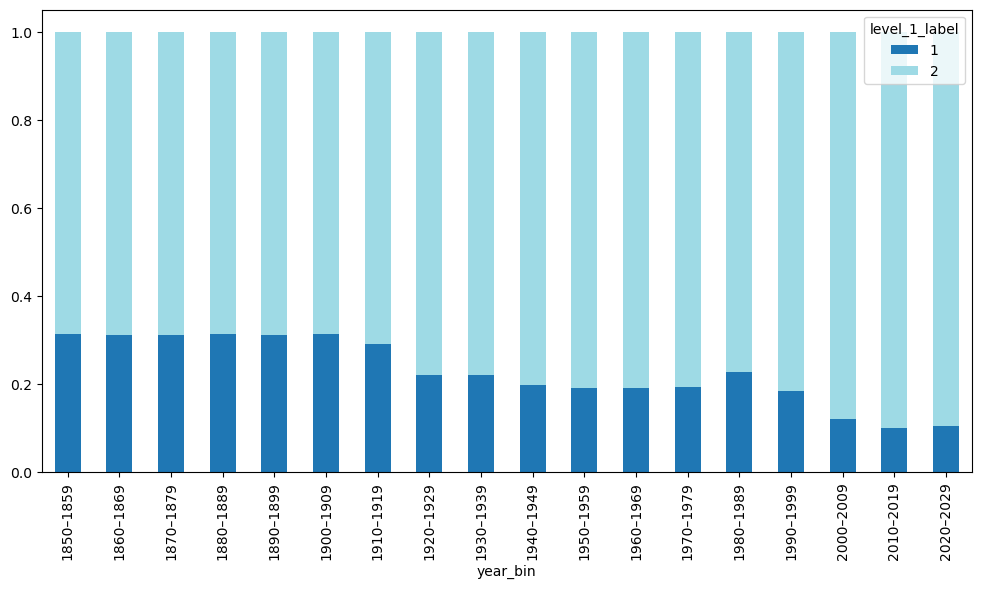

In [22]:
hist_build_types(1)

/tmp/ipykernel_41829/2293897228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = buildings.groupby(["year_bin", f"level_{lvl}_label"]).size().reset_index(name="count")


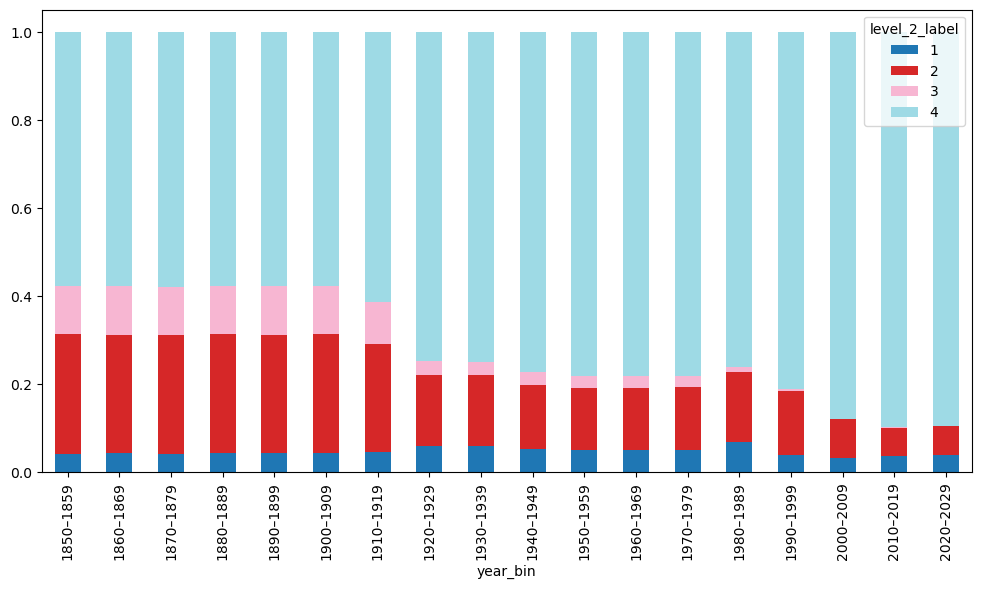

In [23]:
hist_build_types(2)

/tmp/ipykernel_41829/2293897228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = buildings.groupby(["year_bin", f"level_{lvl}_label"]).size().reset_index(name="count")


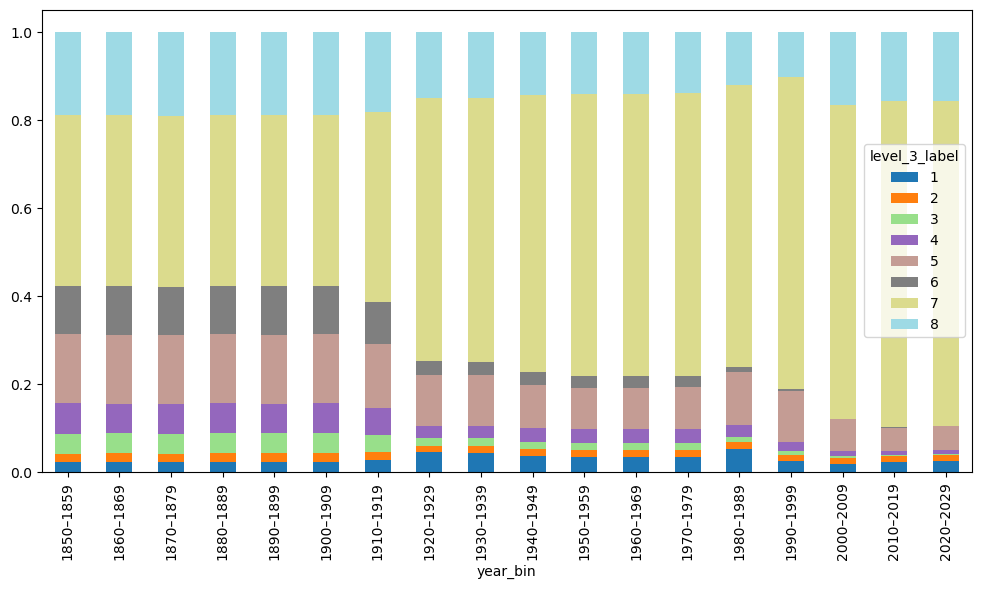

In [24]:
hist_build_types(3)

In [13]:
def types_line(lvl):
    # Group by year and region
    yearly_counts = (
        buildings
        .groupby(["year", f"level_{lvl}_label"])  # region = "East" or "West"
        .size()
        .reset_index(name="count")
    )

    # Pivot so East and West are columns
    pivot_df = yearly_counts.pivot(index="year", columns=f"level_{lvl}_label", values="count").fillna(0)
    pivot_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0)
    ax = pivot_pct.plot(kind="line", figsize=(10,6))
    #ax.set_yscale("log")
    


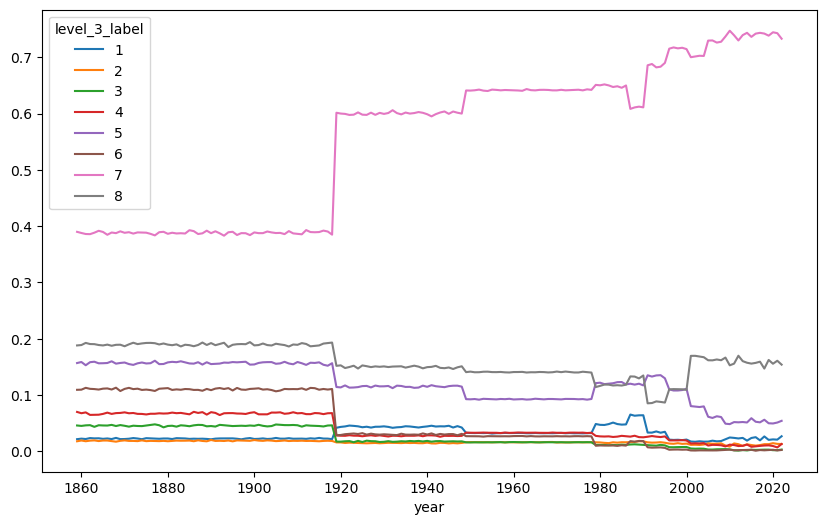

In [14]:
types_line(3)

In [ ]:
def get_cluster_names(mapping_level):

    if mapping_level == 1:
        cluster_names = {
     1: 'Incoherent Fabric',
     2: 'Coherent Fabric',
}

    elif mapping_level == 2:
        cluster_names ={
    1: 'Incoherent Large-Scale Fabric',
    2: 'Incoherent Small-Scale Fabric',
    3: 'Coherent Interconnected Fabric',
    4: 'Coherent Dense Fabric'
    
}

    
    elif mapping_level == 3:
        cluster_names = {
    1: "Incoherent Large-Scale Homogenous Fabric",
    2: "Incoherent Large-Scale Heterogenous Fabric",
    3: "Incoherent Small-Scale Linear Fabric",
    4: "Incoherent Small-Scale Sparse Fabric",
    5: "Incoherent Small-Scale Compact Fabric",
    6: "Coherent Interconnected Fabric",
    7: "Coherent Dense Disjoint Fabric",
    8: "Coherent Dense Adjacent Fabric"
}
    else:
        raise Exceptions('Not named')

    return cluster_names

In [4]:
# Example: list of Eastern NUTS1 codes
eastern_nuts1 = {"3", "4", "8", "D", "E", "G"}

# Extract the first 3 characters from 'id' and map to Eastern/Western
buildings["east_west"] = buildings["id"].str[2].apply(lambda x: "eastern" if x in eastern_nuts1 else "western")
buildings

,geometry,morph,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,index_right,year,id,east_west
1154_128880,"POLYGON ((6.73003 49.18855, 6.73011 49.18861, ...",1154_193_0,False,2,4,7,15,22,53,99,150699,1967,DEC_301181813,western
1154_128806,"POLYGON ((6.73036 49.18881, 6.73047 49.18888, ...",1154_193_0,False,2,4,7,15,22,53,99,256047,1966,DEC_301181835,western
1154_128833,"POLYGON ((6.7303 49.18911, 6.73033 49.18913, 6...",1154_193_0,False,2,4,7,15,22,53,99,210042,1949,DEC_301181822,western
1154_128868,"POLYGON ((6.72962 49.1888, 6.72969 49.18885, 6...",1154_193_0,False,2,4,7,15,22,53,99,60597,1971,DEC_301181966,western
1154_128835,"POLYGON ((6.7294 49.1887, 6.72952 49.18879, 6....",1154_193_0,False,2,4,7,15,22,53,99,73170,1957,DEC_301181934,western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289_544749,"POLYGON ((13.31611 48.32543, 13.31617 48.32547...",51289_8434_11,False,2,4,7,13,20,47,87,3035810,1958,DE2_DEBY_LOD2_7944607,western
51289_544745,"POLYGON ((13.31638 48.32562, 13.31648 48.32569...",51289_8434_1,False,2,4,7,15,22,53,97,3007219,1955,DE2_DEBY_LOD2_7944608,western
51289_545797,"POLYGON ((13.31659 48.32516, 13.31673 48.32521...",51289_8434_11,False,2,4,7,13,20,47,87,1120094,1973,DE2_DEBY_LOD2_7944295,western
51289_544818,"POLYGON ((13.31627 48.32494, 13.31645 48.325, ...",51289_8434_11,False,2,4,7,13,20,47,87,252234,1972,DE2_DEBY_LOD2_7944296,western


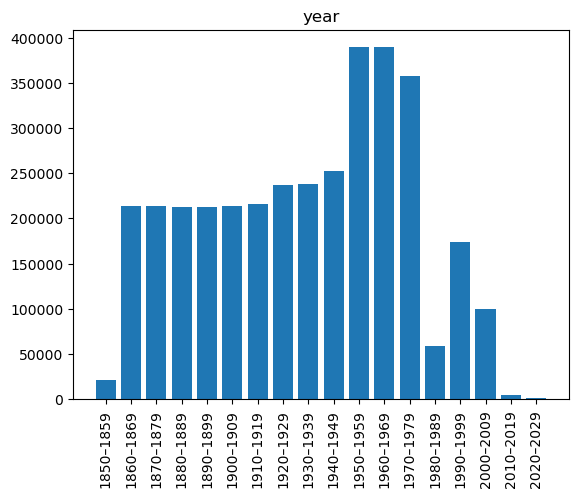

In [25]:
buildings.mask(buildings["east_west"]=="western").hist(column="year",bins=bins, rwidth=0.8)
plt.xticks(bin_centers, bin_labels, rotation=90)
plt.grid(False)

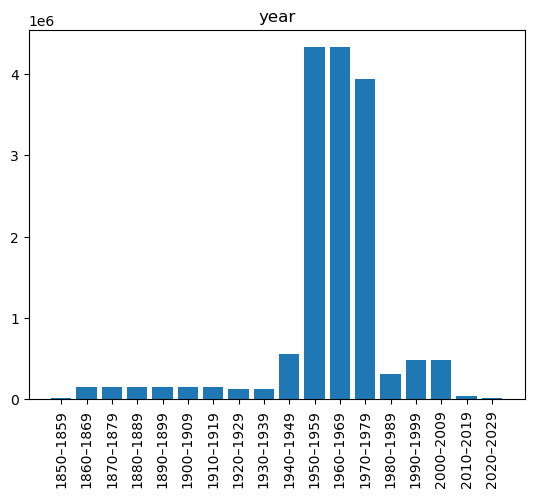

In [26]:
buildings.mask(buildings["east_west"]=="eastern").hist(column="year",bins=bins, rwidth=0.8)
plt.xticks(bin_centers, bin_labels, rotation=90)
plt.grid(False)